# Logistic Regression for M&Ms

Let's learn about logistic regression with candy! See the [accompanying episode]() for more information.

First, we're going to import some Python packages.

In [1]:
# display plots interactively
%matplotlib notebook

# import matplotlib for plotting
import matplotlib.pyplot as plt

# optionally: import seaborn for making plots prettier
# you can comment this out if you don't have seaborn installed
import seaborn as sns
sns.set_style('whitegrid')

# numerical Python!
import numpy as np

# table reading fun
import pandas as pd

Let's first load out sweets data, which you should find in the `data` directory:

In [2]:
datafile = "../data/sweets_data_200611.tsv"

In [3]:
data = pd.read_csv(datafile, sep="\t")

In [4]:
data.head()

,Type of Candy,has_m,has_s,length,width,height,colour
0,peanut m&m,1,0,1.8,1.3,1.0,blue
1,peanut m&m,1,0,1.6,1.3,1.0,blue
2,peanut m&m,1,0,1.7,1.2,0.9,orange
3,peanut m&m,1,0,2.3,1.1,1.0,blue
4,peanut m&m,1,0,1.6,1.3,0.8,blue


First let's separate out our _labels_, i.e. the type of candy we're looking at:

In [5]:
labels = data["Type of Candy"]

And we'll also separate out our _features_, i.e. the measurements we've taken:

In [6]:
data.columns

Index(['Type of Candy', 'has_m', 'has_s', 'length', 'width', 'height',
       'colour'],
      dtype='object')

In [7]:
features = data[['has_m', 'has_s', 'length', 'width', 'height','colour']]

Right now, we're only interested in peanut and plain M&Ms, so we're going to make a new 
array that has only those entries in it:

In [8]:
features_small = features[(labels == "peanut m&m") | (labels == "plain m&m")]
labels_small = np.array(labels[(labels == "peanut m&m") | (labels == "plain m&m")])

In [9]:
features_small.head()

,has_m,has_s,length,width,height,colour
0,1,0,1.8,1.3,1.0,blue
1,1,0,1.6,1.3,1.0,blue
2,1,0,1.7,1.2,0.9,orange
3,1,0,2.3,1.1,1.0,blue
4,1,0,1.6,1.3,0.8,blue


As you can see in the table above, our labels are currently in text form, that is, when I recorded the data, I wrote down in words what I was measuring, whether it was a plain M&M or a skittle or another type of candy.
For logistic regression, we're going to turn our text labels for plain and meanut M&Ms into a numerical label, i.e. 0 and 1, like so:

    plain m&m = 0
    peanut m&m = 1

In [10]:
labels_small[labels_small == "plain m&m"] = 0.0
labels_small[labels_small == "peanut m&m"] = 1.0

labels_small = np.array(labels_small, dtype=int)

In [11]:
labels_small

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

Great!  Now we can plot a graph of the length, and the corresponding label:

<IPython.core.display.Javascript object>


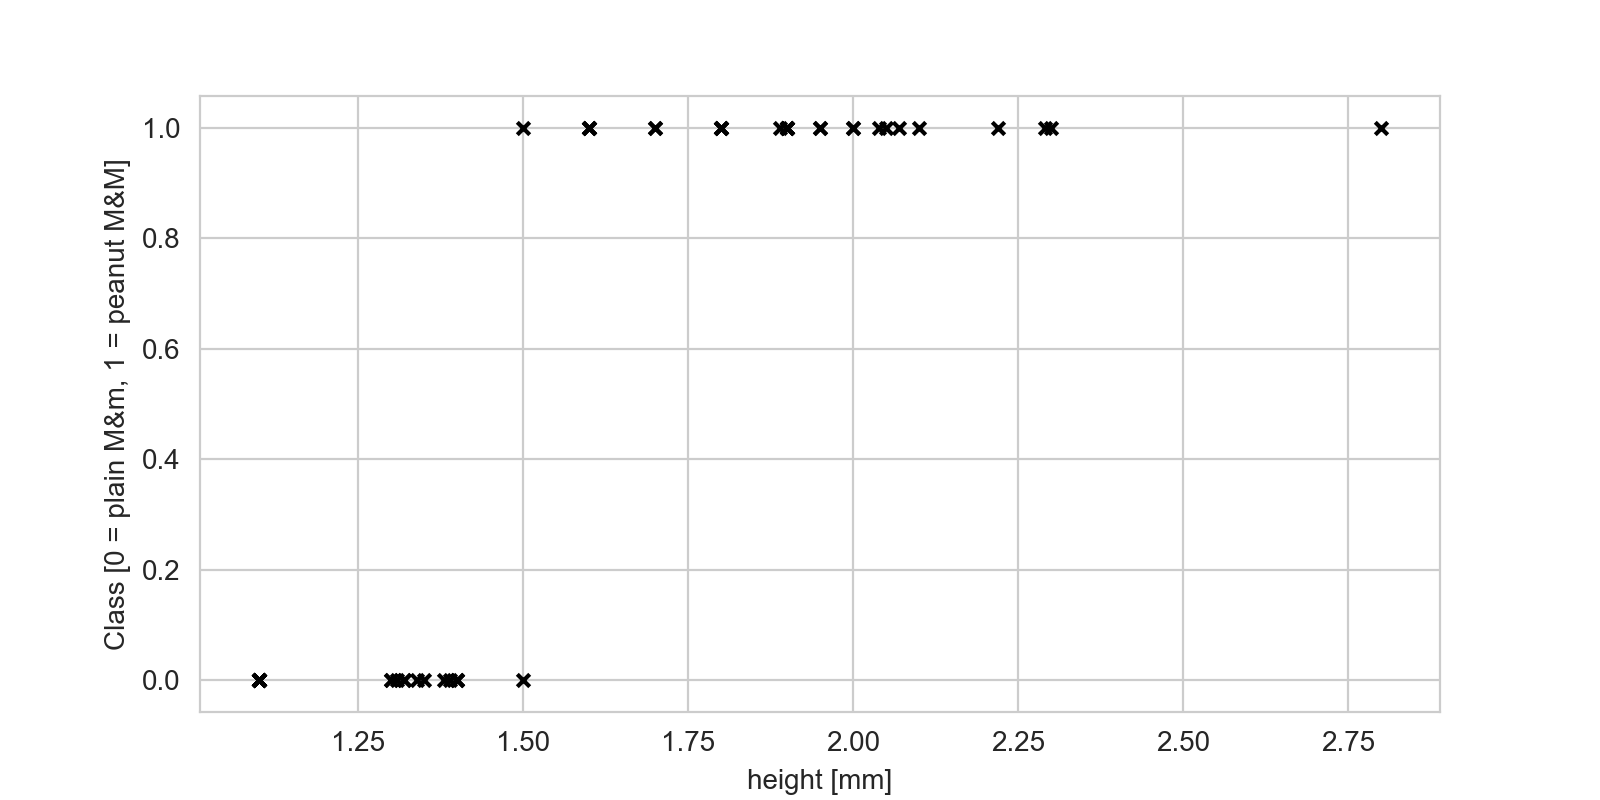

Text(0, 0.5, 'Class [0 = plain M&m, 1 = peanut M&M]')

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

ax.scatter(features_small["length"], labels_small, s=20, c="black", marker="x")
ax.set_xlabel("height [mm]")
ax.set_ylabel("Class [0 = plain M&m, 1 = peanut M&M]")

We can see that peanut M&Ms are on average longer than plain M&Ms. This is perhaps not surprising, since they need to fit a peanut inside of them, and plain M&Ms are generally smaller and rounder. 

### The Logistic Function

Before we can try to draw a function through our data points on this graph, let's first define the logistic function:

In [13]:
def logistic(x, a, b):
    """
    Logistic function. 
    
    Parameters
    ----------
    x : float or iterable
        A single value or list of features. 
        
    a, b: floats
        Parameters for the linear model.
    """
    z = a * x + b
    y = 1.0 / (1. + np.exp(-z))
    return y

Before we see what this looks like let's plot just the straight line part of this:

In [14]:
def straight_line(x, a, b):
    return a * x + b

<IPython.core.display.Javascript object>


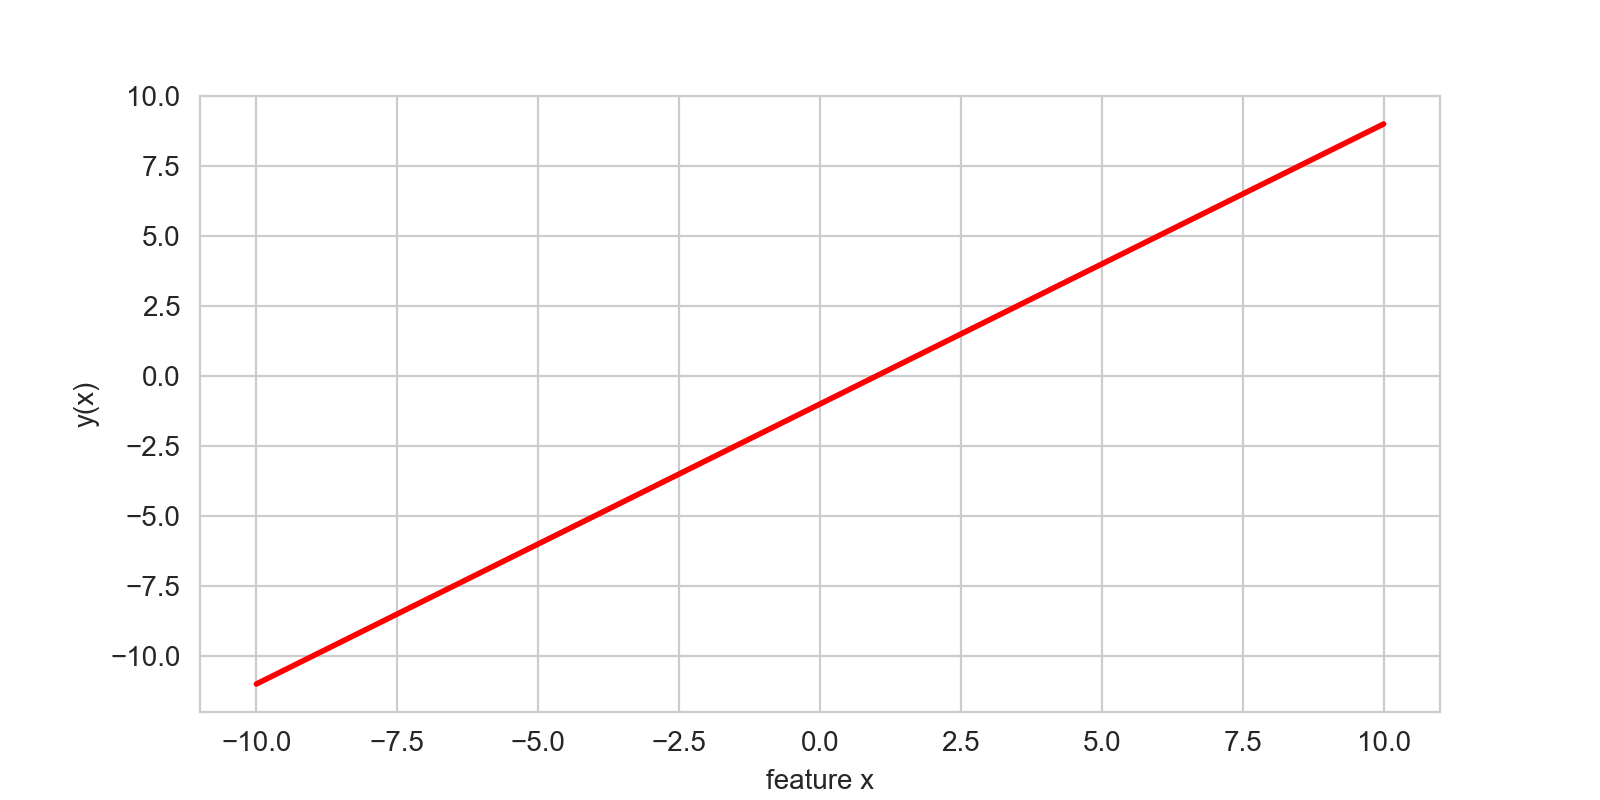

Text(0, 0.5, 'y(x)')

In [15]:
a = 1.0
b = -1.0

# make a list of equally spaced points between 
# -5 and 5
min_x = -10
max_x = 10
x = np.linspace(min_x, max_x, 1000)

y = straight_line(x, a, b)

fig, ax = plt.subplots(1, 1, figsize=(8,4))

ax.plot(x, y, lw=2, color="red")
ax.set_xlabel("feature x")
ax.set_ylabel("y(x)")

Let's see what this looks like for `a=1` and `b=0`:

In [16]:
a = 1.0
b = -1.0

# make a list of equally spaced points between 
# -5 and 5
min_x = -10
max_x = 10
x = np.linspace(min_x, max_x, 1000)

y = logistic(x, a, b)

<IPython.core.display.Javascript object>


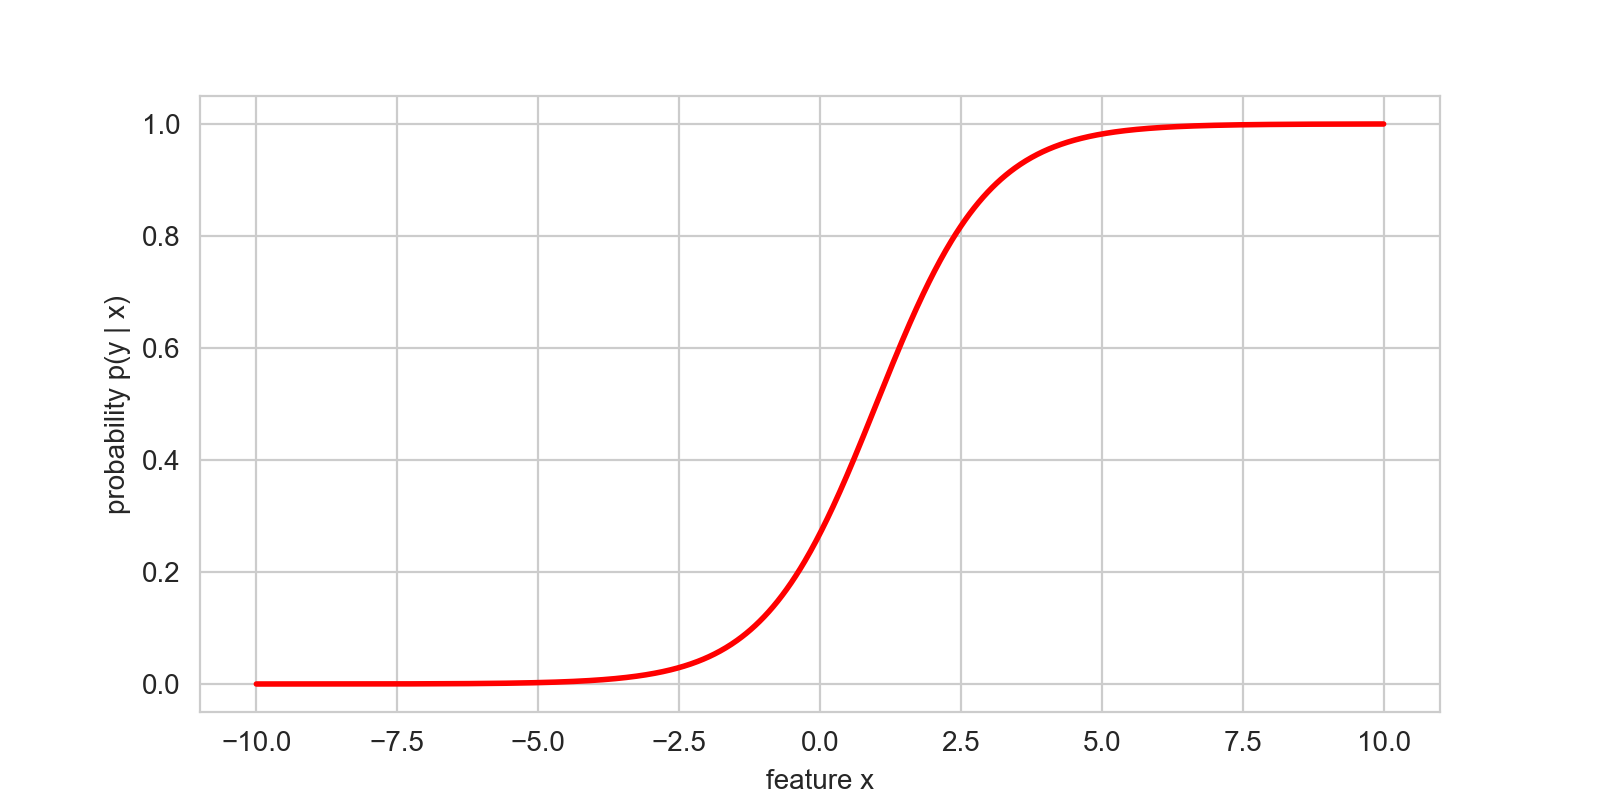

Text(0, 0.5, 'probability p(y | x)')

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

ax.plot(x, y, lw=2, color="red")
ax.set_xlabel("feature x")
ax.set_ylabel("probability p(y | x)")

**Exercise**: Experiment with different values for `a` and `b`, and see how the shape of this function changes. What effect does changing `a` and `b` have on the shape of the function?

Hint: If you change `a` and `b` and end up with a funny looking plot try changing the minimum and maximum values for x in `linspace`, `min_x` and `max_x` to expand the range of values being plotted.


Let's now go back to our data, and plot both our M&Ms and the logistic function in a single plot:

<IPython.core.display.Javascript object>


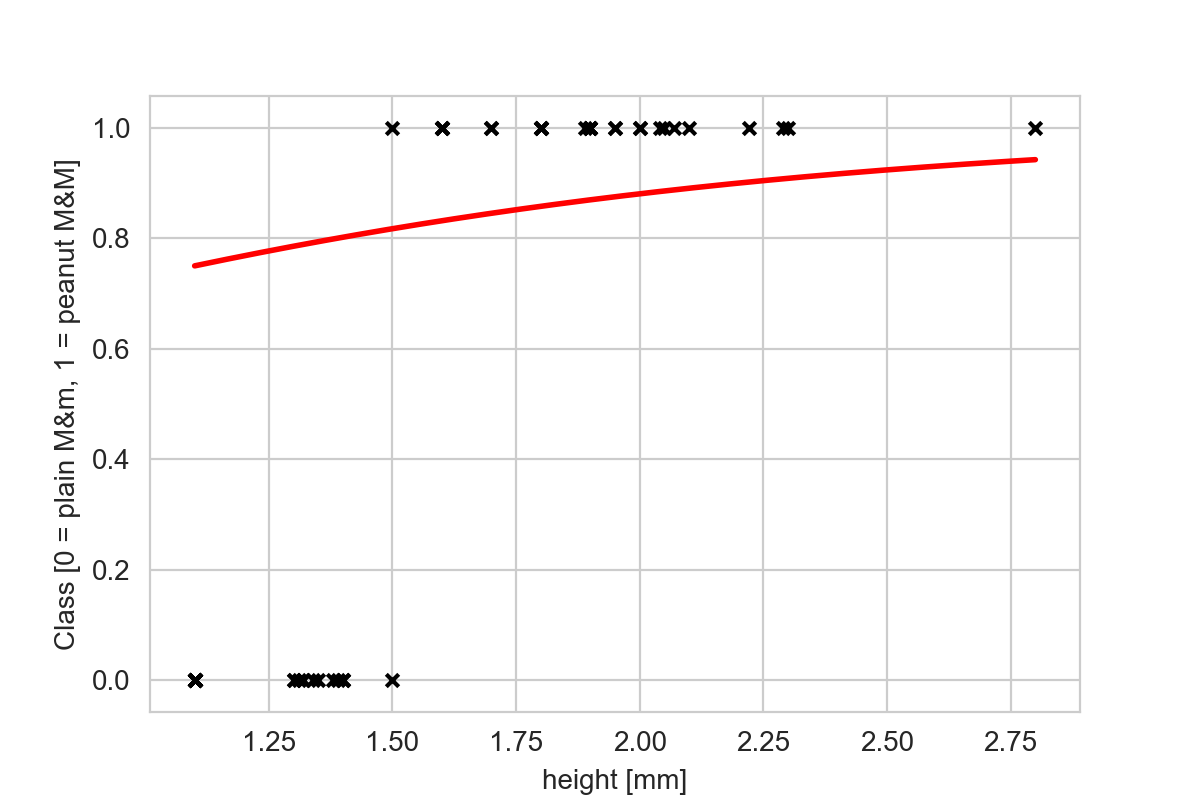

In [18]:
# make the overall plot
fig, ax = plt.subplots(1, 1, figsize=(6,4))

# add the data points for peanut and plain M&Ms
ax.scatter(features_small["length"], labels_small, s=20, c="black", marker="x")
ax.set_xlabel("height [mm]")
ax.set_ylabel("Class [0 = plain M&m, 1 = peanut M&M]")

# now let's make a logistic function in the range where we have data:
a = 1
b = 0

# make a list of equally spaced points between 
# -5 and 5
min_x = np.min(features_small['length'])
max_x = np.max(features_small["length"])
x = np.linspace(min_x, max_x, 1000)

y = logistic(x, a, b)

ax.plot(x, y, lw=2, color="red")

Well, that doesn't look super great yet!

**Exercise**: Based on your explorations above, can you find values for `a` and `b` that make the function go through the data points?


In [19]:
# Solution
# a = 50
# b = -76.0 



### Classification with Two Features

Let's now take a look at the case where we have more than one feature. So far, we've done all of this by hand, but that's not very practical when you add more features, because each feature adds a parameter, and a _dimension_ to your problem. This makes visualizing the data and model as we've done above more difficult, and it also makes it much harder to find good values for the parameters.

We're going to use a standard library, `scikit-learn`, to help us find good values for `a` and `b`.

In [20]:
from sklearn.linear_model import LogisticRegression

First, let's pull out the length and width of our M&Ms:

In [21]:
X = np.array(features_small[["length", "width"]])

Let's see where they fall on a plot:

<IPython.core.display.Javascript object>


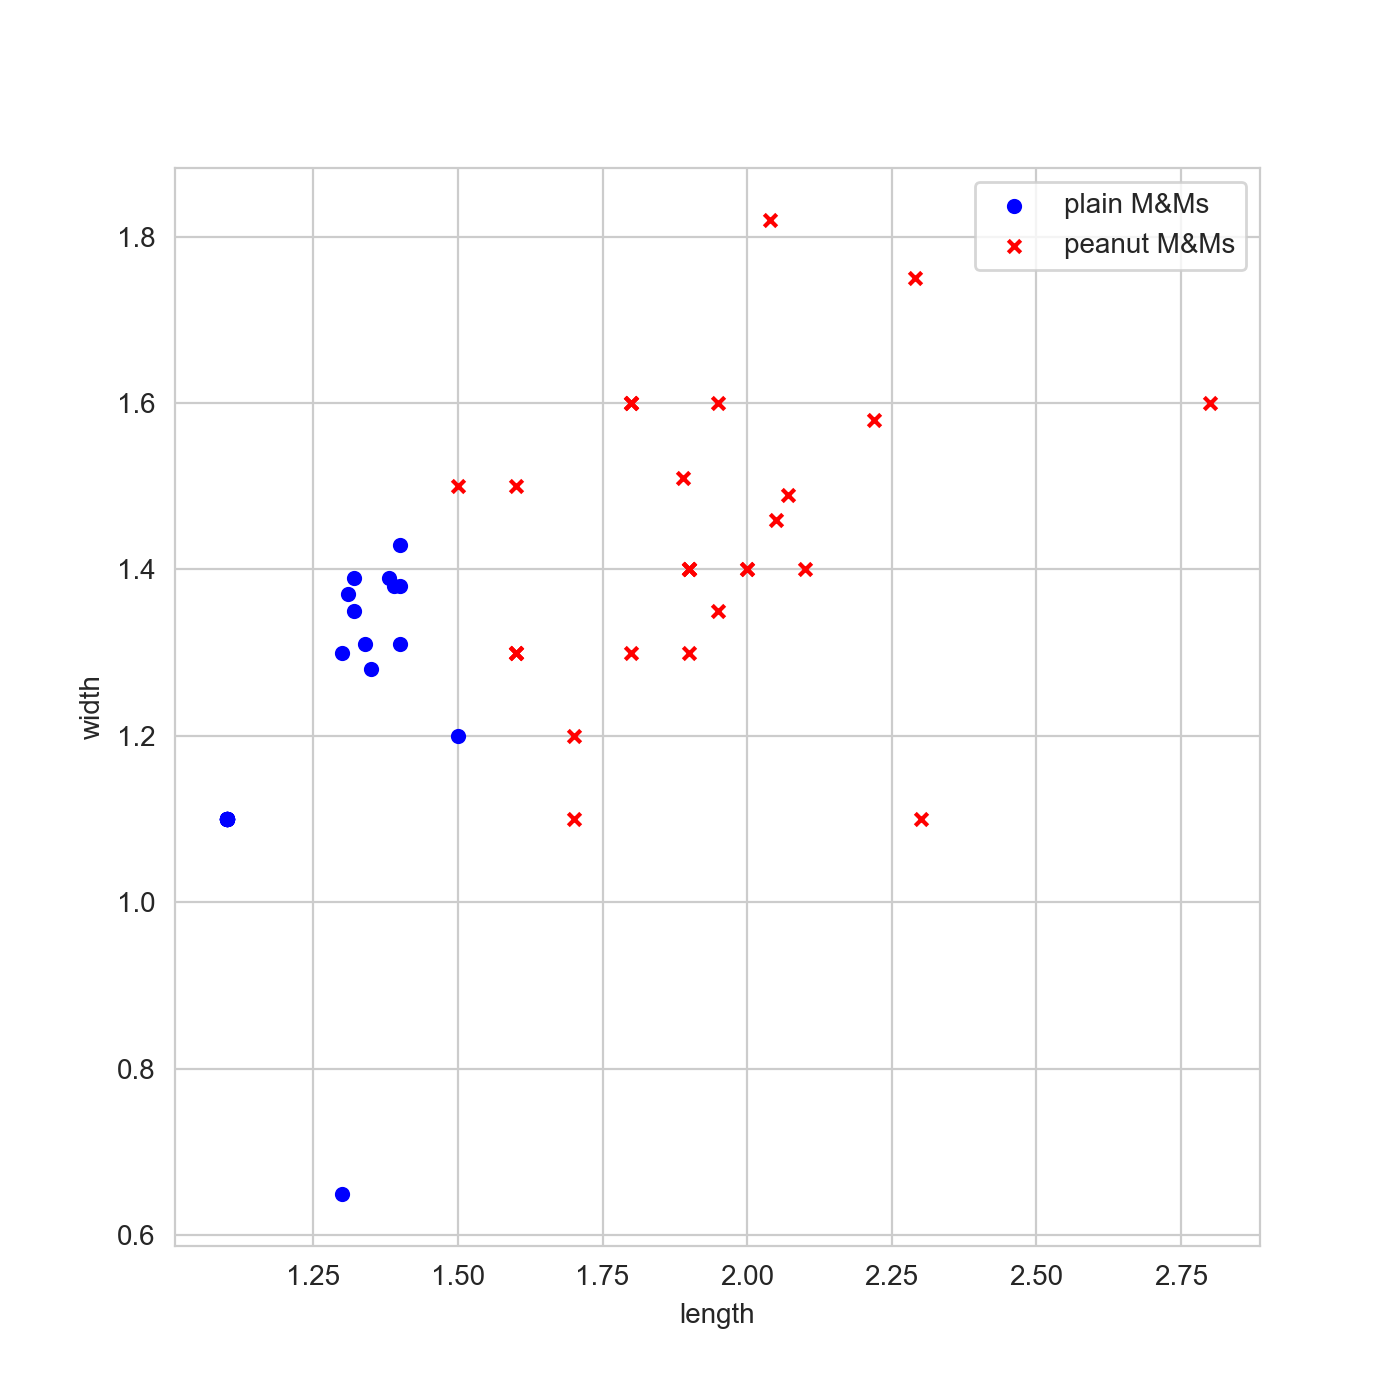

In [22]:
fig, ax  = plt.subplots(1, 1, figsize=(7,7))

ax.scatter(X[labels_small == 0,0], X[labels_small == 0,1], color="blue", s=20, marker="o", label="plain M&Ms")
ax.scatter(X[labels_small == 1,0], X[labels_small == 1,1], color="red", s=20, marker="x", label="peanut M&Ms")

ax.set_xlabel("length")
ax.set_ylabel("width")
ax.legend()

You can see that the plain M&Ms all cluster in the left side of the plot, and the peanut M&Ms on the right side.

**Exercise**: Hold up a pen or a ruler to the screen and see if you can position it such that it makes a line separating the plain and the peanut M&Ms. Can you do it? If you use one of the other features (e.g. height), does that change your ability to separate the two classes?

### Fitting a Model

Let's now fit our model to the data. We're going to use the [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model in `scikit-learn`:

In [23]:
# set up the model
# it has lots of parameters, but let's not worry about those now
lr = LogisticRegression()

# you can have the computer estimate the parameters by using the `fit` 
# function, and the features and labels for our data:
lr.fit(X, labels_small)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The parameters for our model, i.e. the slopes $a_1$ and $a_2$, and the intercept $b$ can be accessed by calling the `coef_` and `intercept_` keywords:

In [24]:
lr.intercept_

array([-6.33220225])

In [25]:
lr.coef_

array([[3.3132676 , 0.96229659]])

Let's calculate and draw the decision boundary. This is the line in the 2D space of our features where $p(y | X) = 0.5$:

In [26]:
x = np.linspace(1.25, 1.75, 1000)

dec_boundary = -(lr.coef_[0,0] * x + lr.intercept_ ) / lr.coef_[0,1] 

<IPython.core.display.Javascript object>


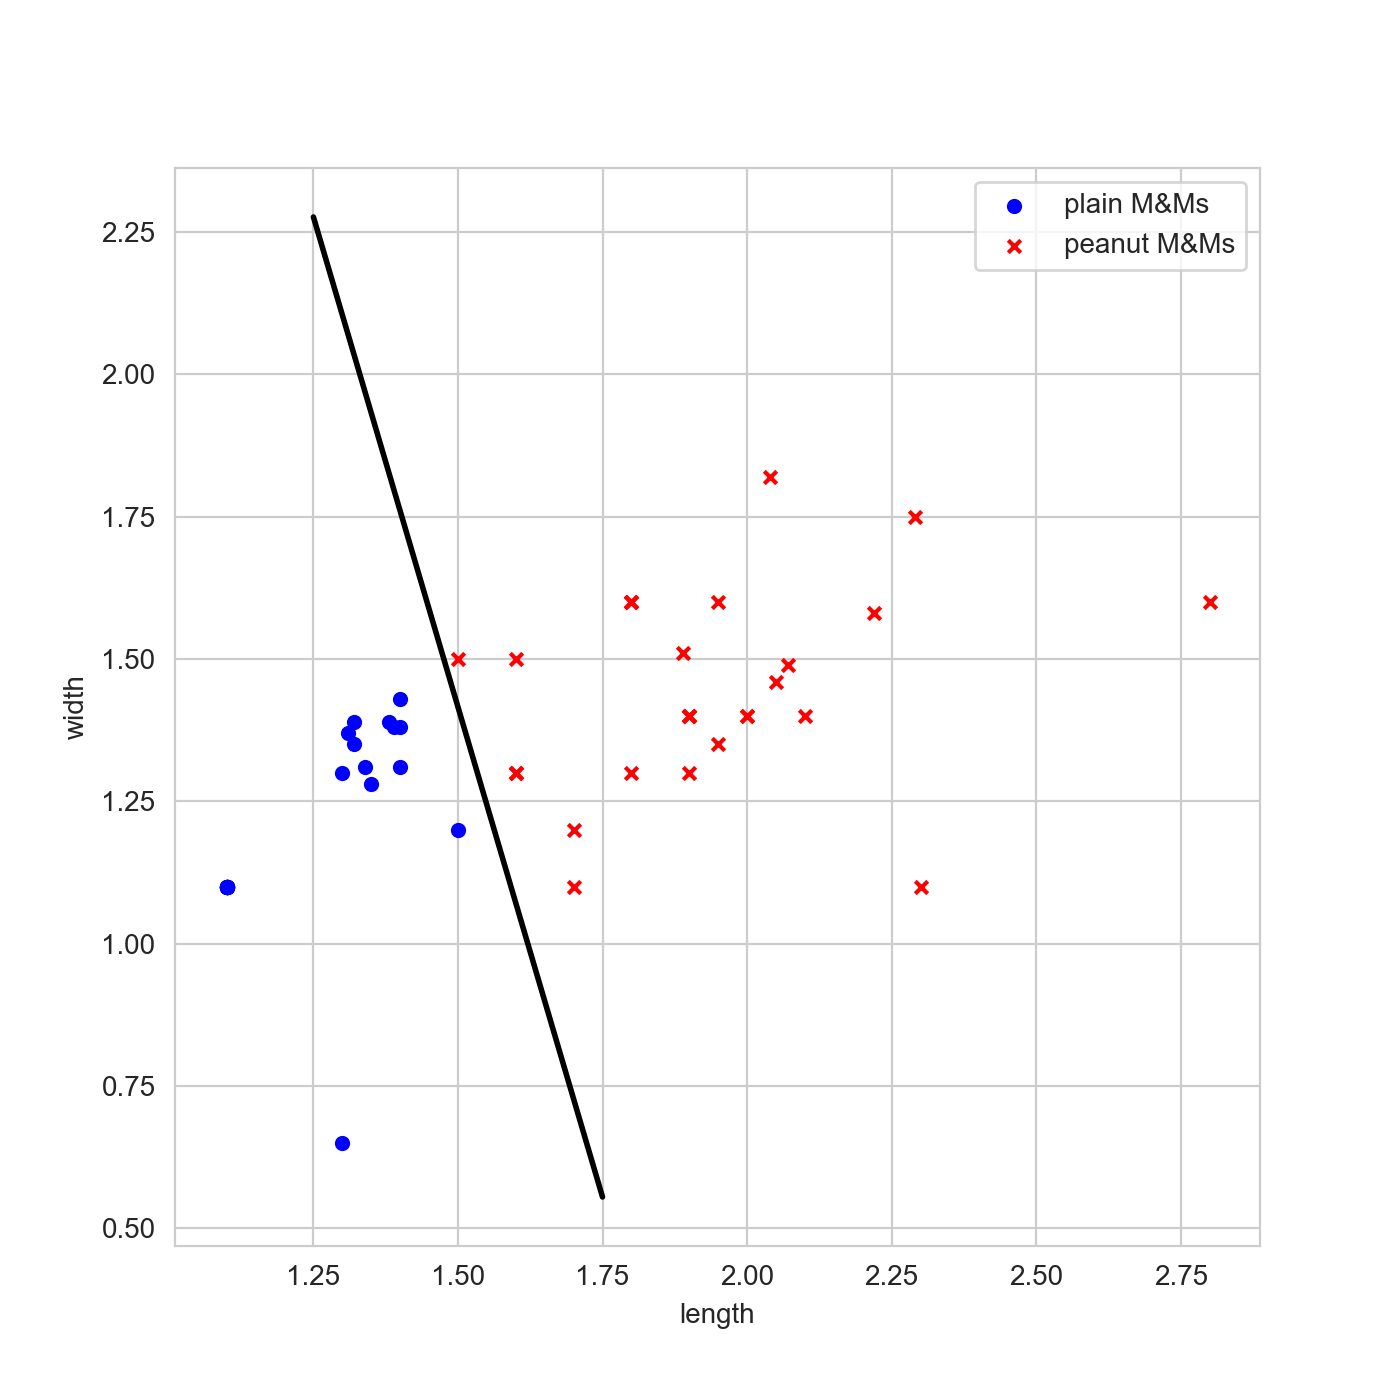

In [27]:
fig, ax  = plt.subplots(1, 1, figsize=(7,7))

ax.scatter(X[labels_small == 0,0], X[labels_small == 0,1], color="blue", s=20, marker="o", label="plain M&Ms")
ax.scatter(X[labels_small == 1,0], X[labels_small == 1,1], color="red", s=20, marker="x", label="peanut M&Ms")


ax.plot(x, dec_boundary, lw=2, color="black")
ax.set_xlabel("length")
ax.set_ylabel("width")
ax.legend()

That looks pretty good! It definitely separates out our two classes. Hooray! We've done machine learning!